<a href="https://colab.research.google.com/github/puput005/SIGNET/blob/main/PRAK_PCD_NIPUTU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import ee
import geemap


In [ ]:
ee.Authenticate()
ee.Initialize(project='prak-479516')
Map = geemap.Map()
Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

In [ ]:
# Membuat geometry AOI (area kajian)
feature = Map.draw_last_feature
# menggunakan feature terakhir yang digambar di map
AOI = feature.geometry()
AOI

ee.Geometry({
  "functionInvocationValue": {
    "functionName": "Feature.geometry",
    "arguments": {
      "feature": {
        "functionInvocationValue": {
          "functionName": "Feature",
          "arguments": {
            "geometry": {
              "functionInvocationValue": {
                "functionName": "GeometryConstructors.Polygon",
                "arguments": {
                  "coordinates": {
                    "constantValue": [
                      [
                        [
                          110.272522,
                          -7.713033
                        ],
                        [
                          110.265656,
                          -7.901471
                        ],
                        [
                          110.45517,
                          -7.907592
                        ],
                        [
                          110.463409,
                          -7.713033
                        ],
                        [
                          110.272522,
                          -7.713033
                        ]
                      ]
                    ]
                  },
                  "geodesic": {
                    "constantValue": false
                  }
                }
              }
            }
          }
        }
      }
    }
  }
})

In [ ]:
# Panggil koleksi citra Landsat 8
landsat8_collection = ee.ImageCollection('LANDSAT/LC08/C02/T1_L2')

# Filter berdasarkan tutupan awan dan AOI
filtered_collection = landsat8_collection \
    .filter(ee.Filter.lt('CLOUD_COVER', 10)) \
    .filterBounds(AOI)

In [ ]:
# Buat citra komposit median
composite_image = filtered_collection.median()

# Potong citra dengan AOI dan mengkalikan dengan faktor skala
clipped_image = composite_image.clip(AOI).multiply(0.0000275).add(-0.2)

# Tampilkan citra di geemap
Map = geemap.Map()
Map.centerObject(AOI, 12)

# Gunakan correct band names (SR_B4, SR_B3, SR_B2) untuk citra Landsat 8 Collection 2, Level 2 data
Map.addLayer(clipped_image, {'bands': ['SR_B4', 'SR_B3', 'SR_B2'], 'min': 0, 'max': 0.3}, 'Landsat 8')
Map

Map(center=[-7.8086917734933285, 110.36470147085858], controls=(WidgetControl(options=['position', 'transparen…

In [ ]:
# Pilih band yang akan kita gunakan kedepannya
# Disini saya memilih band Blue (B2), Green (B3), Red (B4), NIR (B5), SWIR1 (B6), dan SWIR2 (B7)
selected_bands = clipped_image.select(['SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'SR_B6', 'SR_B7'])

selected_bands

# Export dengan default WGS84 tanpa mendefinisikan CRS
geemap.ee_export_image_to_drive(
    selected_bands,
    description="Landsat8",
    folder="Pengenalan Python",
    region=AOI,
    scale=30
)

In [ ]:
!pip install rasterio

In [ ]:
import os
from google.colab import drive

# Mount Google Drive (if not already mounted)
drive.mount('/content/drive')

# Check if the path exists
path_to_check = '/content/drive/MyDrive/Pengenalan Python/'
if os.path.exists(path_to_check):
    print(f"Path exists: {path_to_check}")

    # List all files in the directory
    files = os.listdir(path_to_check)
    print("Files in the directory:")
    for file in files:
        print(f"  - {file}")

    # Check for .tif files specifically
    tif_files = [f for f in files if f.lower().endswith('.tif')]
    print(f"\nTIFF files found: {tif_files}")
else:
    print(f"Path does not exist: {path_to_check}")


Mounted at /content/drive
Path exists: /content/drive/MyDrive/Pengenalan Python/
Files in the directory:
  - Landsat8.tif

TIFF files found: ['Landsat8.tif']


In [ ]:
# Buka kembali dataset
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Path ke file Landsat
raster_file_path = '/content/drive/MyDrive/Pengenalan Python/Landsat8.tif'

# Buka dataset
with rasterio.open(raster_file_path) as dataset:
    # Baca semua band
    landsat8_image_all = dataset.read()
    print("Shape awal:", landsat8_image_all.shape)

    # Cek posisi band
    desc = dataset.descriptions
    print('Raster description:', desc)
    print('Jumlah band:', dataset.count)

    # Tampilkan info setiap band
    print("\nInformasi setiap band:")
    for i in range(dataset.count):
        band_data = dataset.read(i+1)
        print(f"Band {i+1}: {desc[i] if desc else 'Unknown'}")
        print(f"  Min: {band_data.min():.4f}, Max: {band_data.max():.4f}, Mean: {band_data.mean():.4f}")

# Dataset akan otomatis tertutup setelah keluar dari block 'with'

# Sekolah format shape menjadi row, column, bands untuk plotting
landsat8_image_all = landsat8_image_all.transpose(1, 2, 0)
print("\nShape setelah transpose:", landsat8_image_all.shape)


Shape awal: (6, 723, 735)
Raster description: ('SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'SR_B6', 'SR_B7')
Jumlah band: 6

Informasi setiap band:
Band 1: SR_B2
  Min: nan, Max: nan, Mean: nan
Band 2: SR_B3
  Min: nan, Max: nan, Mean: nan
Band 3: SR_B4
  Min: nan, Max: nan, Mean: nan
Band 4: SR_B5
  Min: nan, Max: nan, Mean: nan
Band 5: SR_B6
  Min: nan, Max: nan, Mean: nan
Band 6: SR_B7
  Min: nan, Max: nan, Mean: nan

Shape setelah transpose: (723, 735, 6)


Shape awal: (6, 723, 735)
Shape setelah transpose: (723, 735, 6)
Raster description: ('SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'SR_B6', 'SR_B7')
Jumlah band: 6


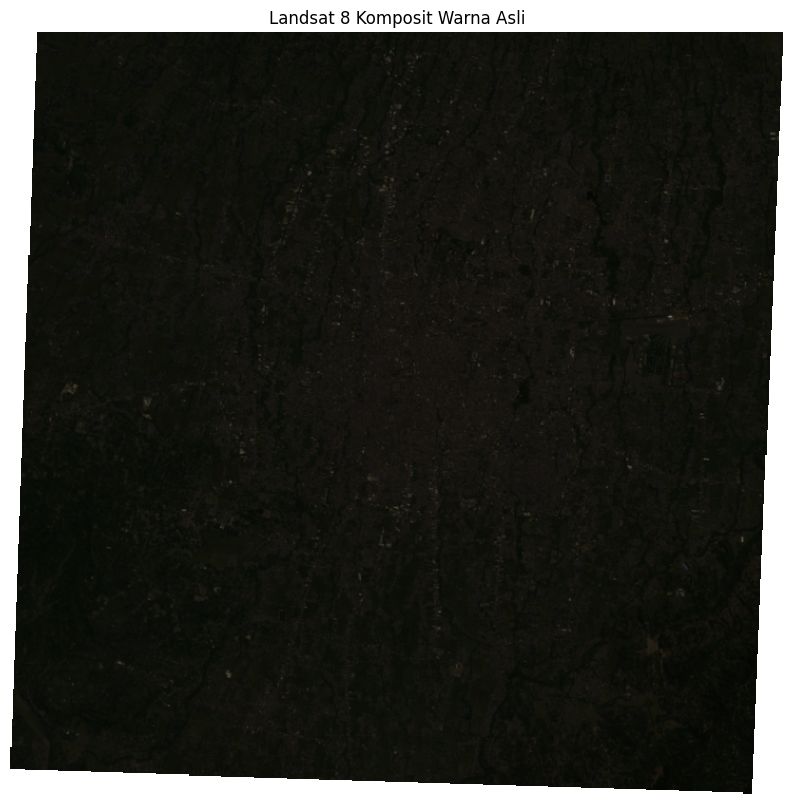

In [ ]:
# Untuk membuka semua band di data raster, kita bisa menggunakan
with rasterio.open('/content/drive/MyDrive/Pengenalan Python/Landsat8.tif') as dataset:
    landsat8_image_all = dataset.read()
    print("Shape awal:", landsat8_image_all.shape)

    # Bisa kita lihat, format shape dari data tersebut adalah bands, row, column
    # Untuk Plot data raster dengan matplotlib, kita harus menggunakan format shape row, column, bands
    # Ubah format shape menjadi row, column, bands:
    landsat8_image_all = landsat8_image_all.transpose(1, 2, 0)
    print("Shape setelah transpose:", landsat8_image_all.shape)

    # Cek posisi band terlebih dahulu
    desc = dataset.descriptions
    print('Raster description:', desc)
    print('Jumlah band:', landsat8_image_all.shape[2])

# Kita akan menggunakan matplotlib plot
import matplotlib.pyplot as plt

# Plotting RGB image
plt.figure(figsize=(10, 10))

# Disini kita memilih band dengan urutan 2, 1, 0 (atau B4, B3, B2), silahkan sesuaikan dengan komposit citra yang diinginkan
plt.imshow(landsat8_image_all[:, :, (2, 1, 0)])

plt.title("Landsat 8 Komposit Warna Asli")
plt.axis('off')
plt.show()



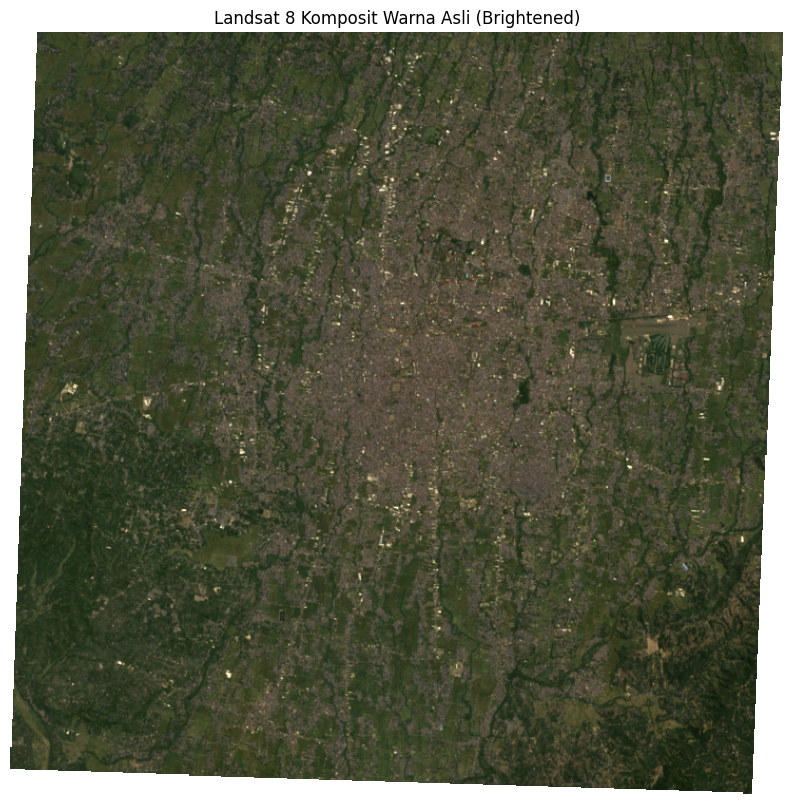

In [ ]:
# Membuat code untuk meningkatkan brightness citra visualisasi
brightness_factor = 4  # bisa diatur sesuai dengan keinginan
landsat8_Vis_rgb = np.clip(landsat8_image_all[:, :, (2, 1, 0)] * brightness_factor, 0, 1)

# Kemudian kita bisa memvisualisasikan komposit RGB yang sudah dibrightness
plt.figure(figsize=(10, 10))
plt.imshow(landsat8_Vis_rgb)
plt.title("Landsat 8 Komposit Warna Asli (Brightened)")
plt.axis('off')
plt.show()

Raster description: ('SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'SR_B6', 'SR_B7')
Shape landsat8_image_all: (723, 735, 6)
Jumlah band tersedia: 6
Komposit warna semu berhasil dibuat


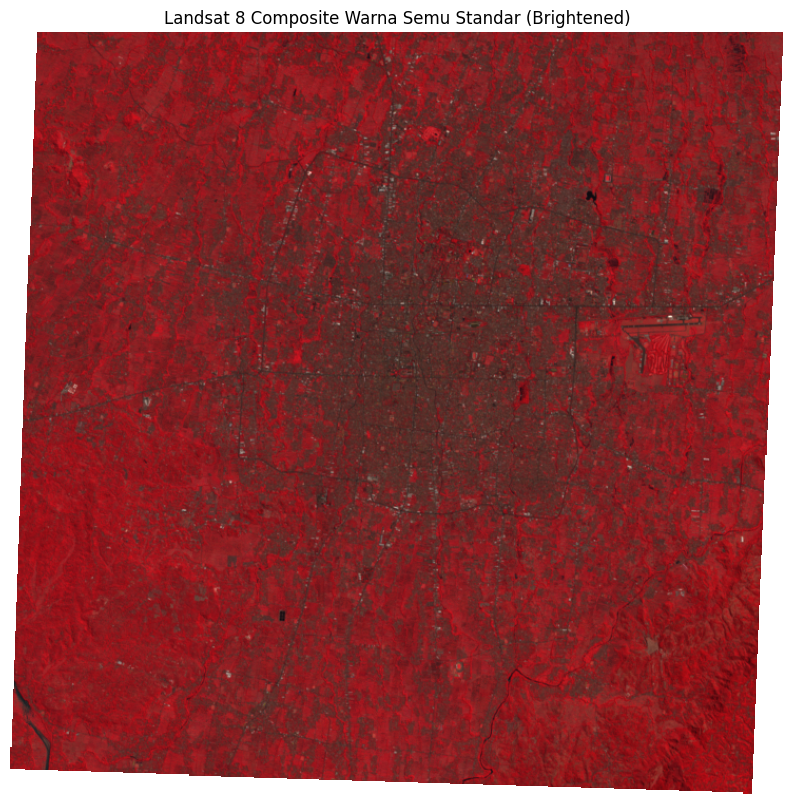

In [23]:
# Membuat komposit warna semu (NIR-Green-Blue)
# Pastikan dataset masih terbuka
with rasterio.open('/content/drive/MyDrive/Pengenalan Python/Landsat8.tif') as dataset:
    # Cek posisi band terlebih dahulu
    desc = dataset.descriptions
    print('Raster description:', desc)

# Berdasarkan deskripsi diatas, posisi Nir adalah urutan ke 3
# Maka untuk membuat komposit warna semu (NIR-Red-Green) -> (B8,B4,B3) -> (3,1,2)
brightness_factor = 2

# Pastikan band yang dipilih tersedia
print("Shape landsat8_image_all:", landsat8_image_all.shape)
print("Jumlah band tersedia:", landsat8_image_all.shape[2])

# Buat komposit warna semu
try:
    landsat8_Vis_semu = np.clip(landsat8_image_all[:, :, (3, 2, 1)] * brightness_factor, 0, 1)
    print("Komposit warna semu berhasil dibuat")
except IndexError as e:
    print(f"Error: {e}")
    print("Menggunakan band alternatif...")
    # Gunakan band yang tersedia
    max_band = landsat8_image_all.shape[2] - 1
    bands_to_use = (min(3, max_band), min(2, max_band), min(1, max_band))
    landsat8_Vis_semu = np.clip(landsat8_image_all[:, :, bands_to_use] * brightness_factor, 0, 1)
    print(f"Menggunakan band: {bands_to_use}")

# Kemudian kita bisa memvisualisasikan komposit warna semu
plt.figure(figsize=(10, 10))
plt.imshow(landsat8_Vis_semu)
plt.title("Landsat 8 Composite Warna Semu Standar (Brightened)")
plt.axis('off')
plt.show()

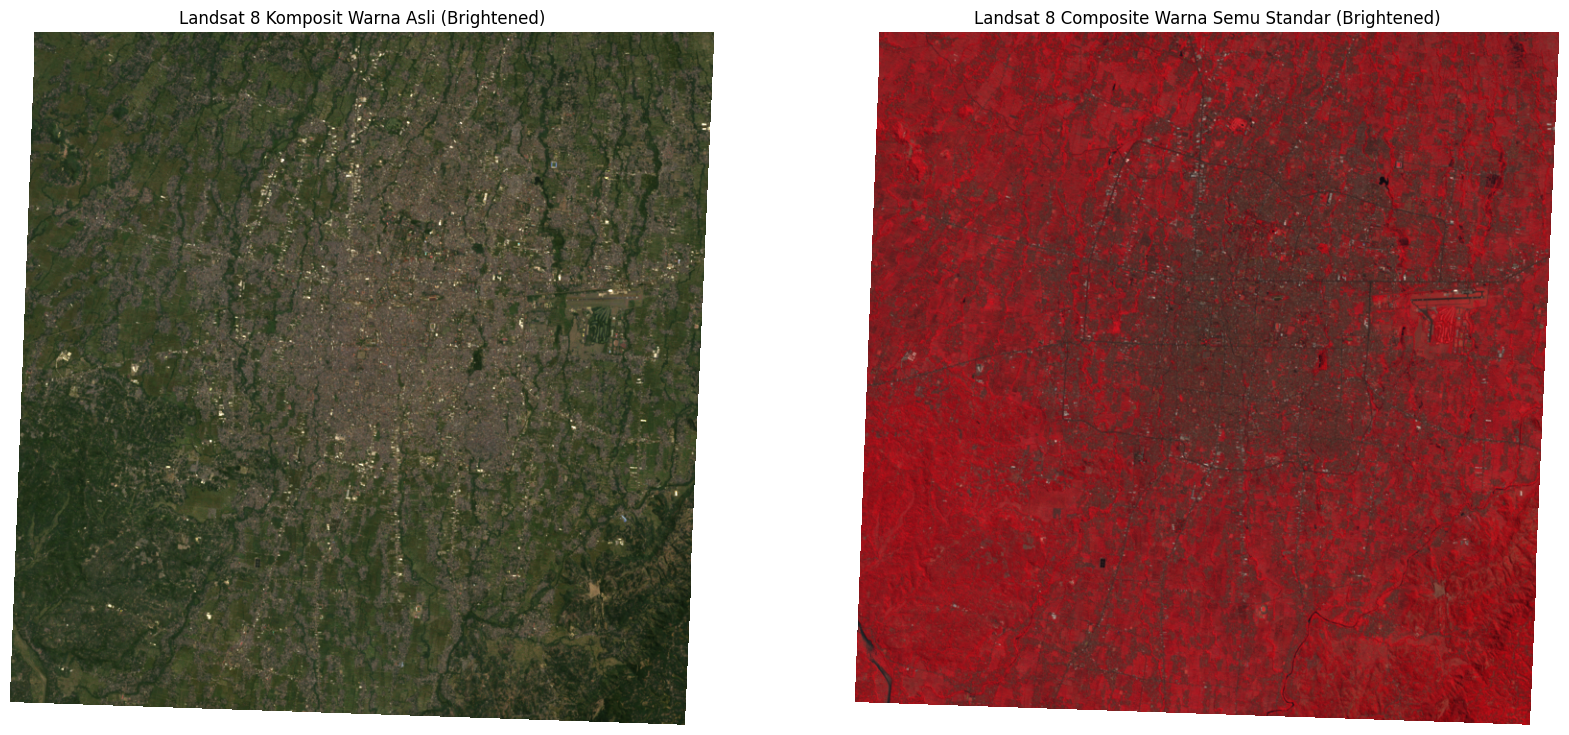

Plot berhasil disimpan sebagai 'landsat8_komposit.jpeg'


In [24]:
# Menggunakan subplot
fig, ax = plt.subplots(1, 2, figsize=(20, 10))  # 1 row, 2 columns

# Plot landsat8_Vis_rgb (Natural Color)
ax[0].imshow(landsat8_Vis_rgb)
ax[0].set_title('Landsat 8 Komposit Warna Asli (Brightened)')
ax[0].axis('off')  # Hilangkan axis

# Plot landsat8_Vis_semu (False Color)
ax[1].imshow(landsat8_Vis_semu)
ax[1].set_title('Landsat 8 Composite Warna Semu Standar (Brightened)')
ax[1].axis('off')  # Hilangkan axis

# Save plot menjadi .jpeg
plt.savefig('landsat8_komposit.jpeg', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("Plot berhasil disimpan sebagai 'landsat8_komposit.jpeg'")